### Mencari metode cleaning terbaik menggunakan model RandomForestClassifier + feature engineering

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

### Dataset dengan metode cleaning KNN, modus, dan zscore

#### Percobaan 1 - tanpa drop fitur

In [12]:
df_knn = pd.read_csv('df_KNN_mode_zscore.csv')

In [3]:
df_knn.columns

Index(['Unnamed: 0', 'date', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x',
       'ddd_x', 'ff_avg', 'RR', 'ddd_car', 'ddd_car.1', 'region_name',
       'flood'],
      dtype='object')

In [10]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6308 non-null   object 
 1   Tn           6308 non-null   float64
 2   Tx           6308 non-null   float64
 3   Tavg         6308 non-null   float64
 4   RH_avg       6308 non-null   float64
 5   ss           6308 non-null   float64
 6   ff_x         6308 non-null   float64
 7   ddd_x        6308 non-null   float64
 8   ff_avg       6308 non-null   float64
 9   RR           6308 non-null   float64
 10  ddd_car      6308 non-null   object 
 11  ddd_car.1    6207 non-null   object 
 12  region_name  6308 non-null   object 
 13  flood        6308 non-null   int64  
dtypes: float64(9), int64(1), object(4)
memory usage: 690.1+ KB


In [13]:
df_knn = df_knn.drop(columns=['Unnamed: 0', 'ddd_car.1'], axis=1)

In [14]:
df_knn_copy = df_knn.copy()

In [27]:
df_knn.iloc[:,1:12]

,Tn,Tx,Tavg,RH_avg,ss,ff_x,ddd_x,ff_avg,RR,ddd_car,region_name
0,26.0,34.8,28.6,81.0,5.800000,5.0,280.0,2.0,9.114286,S,Jakarta Selatan
1,25.6,33.2,27.0,88.0,8.700000,4.0,290.0,2.0,1.600000,W,Jakarta Selatan
2,24.4,34.9,28.1,80.0,5.400000,4.0,280.0,2.0,33.800000,SW,Jakarta Selatan
3,24.8,33.6,29.2,81.0,6.600000,3.0,200.0,1.0,17.742857,S,Jakarta Selatan
4,25.8,33.6,26.7,91.0,3.200000,3.0,180.0,1.0,11.457143,S,Jakarta Selatan
...,...,...,...,...,...,...,...,...,...,...,...
6303,23.8,32.0,28.0,70.0,6.285714,12.0,180.0,5.0,15.571429,W,Jakarta Timur
6304,24.0,33.4,28.5,69.0,4.914286,14.0,250.0,3.0,2.085714,SE,Jakarta Timur
6305,25.2,33.4,28.7,70.0,6.942857,14.0,120.0,5.0,5.300000,SW,Jakarta Timur
6306,24.0,34.4,30.0,64.0,5.742857,14.0,240.0,5.0,6.242857,W,Jakarta Timur


In [28]:
df_train = df_knn.iloc[:,1:12]
df_target = df_knn['flood']

In [29]:
df_train_dummied = pd.get_dummies(df_train, columns=['ddd_car', 'region_name'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_train_dummied, df_target, test_size=0.2, random_state=42)

In [25]:
rf1 = RandomForestClassifier()

In [31]:
model1 = rf1.fit(X_train, y_train)

In [34]:
model1_predict = model1.predict(X_test)

In [35]:
ac1 = accuracy_score(y_test, model1_predict)

### Hasil akurasi tanpa melakukan drop fitur satupun

In [36]:
print('Nilai metrik accuracy metode cleaning ke-1 : ', ac1)

Nilai metrik accuracy metode cleaning ke-1 :  0.9144215530903328


#### Percobaan 2 - drop fitur ss

In [51]:
df_train_2 = df_train.drop(columns=['ss'], axis=1)
df_target = df_knn['flood']

df_train_dummied_2 = pd.get_dummies(df_train_2, columns=['ddd_car', 'region_name'])
X_train, X_test, y_train, y_test = train_test_split(df_train_dummied_2, df_target, test_size=0.2, random_state=42)

In [52]:
rf2 = RandomForestClassifier()
model2 = rf2.fit(X_train, y_train)
model2_predict = model2.predict(X_test)
ac2 = accuracy_score(y_test, model1_predict)

In [53]:
print('Nilai metrik accuracy metode cleaning ke-2 : ', ac2)

Nilai metrik accuracy metode cleaning ke-2 :  0.9112519809825673


Karena nilai akurasi menjadi turun, itu artinya fitur ss memiliki pengaruh terhadap data target

Percobaan 3 - Oversampling

In [43]:
pip install imblearn


     -------------------------------------- 257.7/257.7 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from imblearn.over_sampling import RandomOverSampler

In [58]:
oversampler = RandomOverSampler(random_state=42)

In [59]:
X_resampled, y_resampled = oversampler.fit_resample(df_train_dummied, df_target)

In [60]:
print(y_resampled.value_counts())

flood
0    5832
1    5832
Name: count, dtype: int64


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [63]:
rf3 = RandomForestClassifier()
model3 = rf3.fit(X_train, y_train)
model3_predict = model3.predict(X_test)
ac3 = accuracy_score(y_test, model3_predict)

In [64]:
print('Nilai metrik accuracy metode cleaning ke-3 : ', ac3)

Nilai metrik accuracy metode cleaning ke-3 :  0.9837119588512645


In [65]:
from sklearn.metrics import f1_score,confusion_matrix

<Axes: >

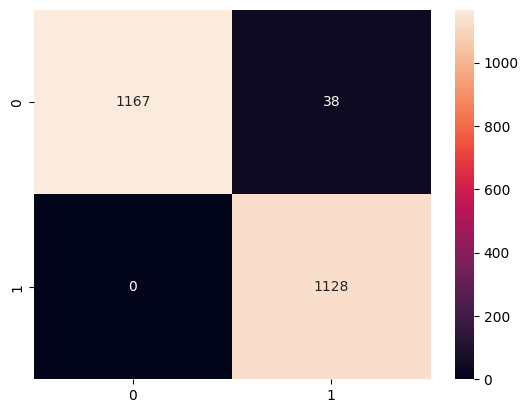

In [68]:
cm_2 = confusion_matrix(y_test,model3_predict)
sns.heatmap(cm_2,annot=True,fmt="d")